In [1]:
import warnings
warnings.simplefilter("ignore")
from msatutil.msat_interface import get_msat

**get_msat** cam load data from multiple **L1B / L2 / L2-post-processed / L3** files under a directory

Here we load L2 files under the **CH4_5x1** directory:

In [2]:
l2 = get_msat('CH4_5x1')

In [3]:
l2

msat_collection:
        number of files: 15
        valid_xtrack: slice(27, 199, None)
        use_dask: True
        is_l1: False
        is_l2: True
        is_l3: False
        is_postproc: False
        is_l2_met: False
        

In [4]:
l2.file_names

array(['MethaneAIR_L2_CO2_20221025T161210_20221025T161240_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161240_20221025T161311_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161311_20221025T161341_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161341_20221025T161411_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161411_20221025T161441_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161441_20221025T161511_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161511_20221025T161541_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161541_20221025T161611_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161612_20221025T161642_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161642_20221025T161712_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161712_20221025T161742_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161742_20221025T161812_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161812_20221025T161842_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161842_20221025T161912_newl1b.nc',
       'MethaneAIR_L

There are many granules in this **msat_collection** object, we can get a subset of granules over a powerplant 

In [5]:
pp = l2.subset(ids=[0,1])

In [6]:
pp

msat_collection:
        number of files: 2
        valid_xtrack: slice(27, 199, None)
        use_dask: True
        is_l1: False
        is_l2: True
        is_l3: False
        is_postproc: False
        is_l2_met: False
        

In [7]:
pp.file_names

array(['MethaneAIR_L2_CO2_20221025T161210_20221025T161240_newl1b.nc',
       'MethaneAIR_L2_CO2_20221025T161240_20221025T161311_newl1b.nc'],
      dtype='<U59')

Use the **search** method to quickly find variables

In [8]:
pp.search('ch4')

GROUP: Profile	VAR: CH4_GasMixingRatio ('lev', 'atrack', 'xtrack')
GROUP: Profile	VAR: CH4_ProxyMixingRatio ('atrack', 'xtrack')
GROUP: Posteriori_Profile	VAR: CH4_GasMixingRatio ('lev', 'atrack', 'xtrack')
GROUP: Posteriori_Profile	VAR: CH4_ProxyMixingRatio ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_ScaleFactor_DoFS ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: APosterioriState ('xmx', 'atrack', 'xtrack') 	SV_VAR: CH4_ScaleFactor 	SV_SLICE: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
GROUP: SpecFitDiagnostics	VAR: CH4_MixingRatioColumn_PosteriorCovar ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_ProxyRatio_PosteriorCovar ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_ColumnAveragingKernel ('lev', 'atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_PostGasColumnError ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_GasColumnError ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_GasColumnErrorComponents ('err_

Methods like **pmesh_prep**, **grid_prep**, and **heatmap**, search for the matching variable in the same way and will use the first match returned by **search** if there are multiple instances like above
To get a variable from one of the other matches, we need to use the full variable name and specify the group

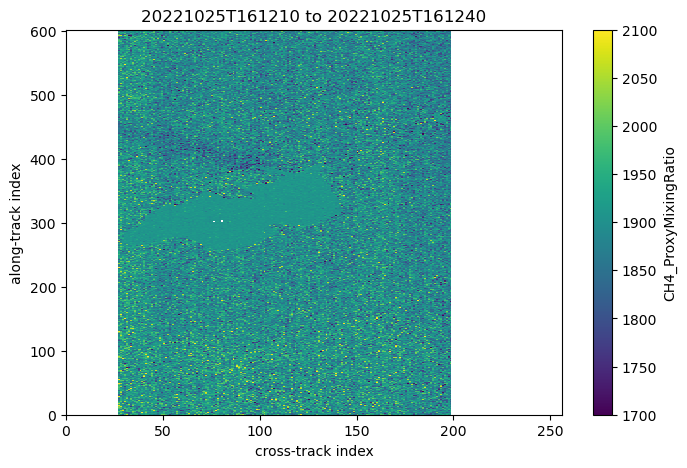

In [9]:
ion()
pp.heatmap('CH4_ProxyMixingRatio',grp='Posteriori_Profile',scale=1e9,vminmax=[1700,2100])

The smooth region is a lake, there is little signal over water so the retrieval defaults to the prior XCH4 value, which is very smooth. The data over the lakes would be flagged in a **L2-post-processed** file

By default **heatmap** plots the variable vs cross- and along-track indices.

The plot can be made in latitude and longitude with the **latlon** argument

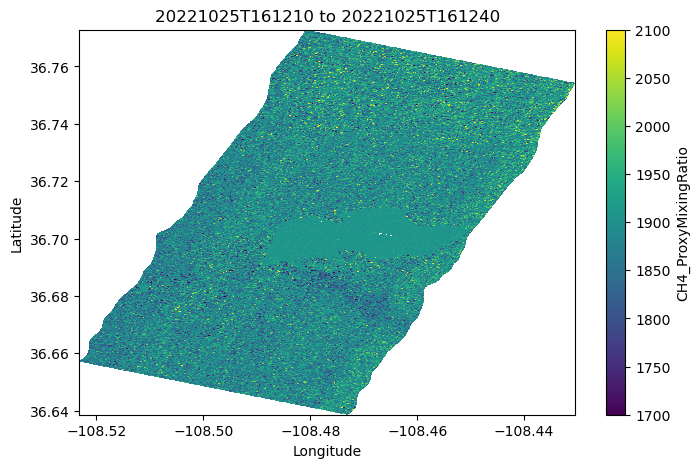

In [10]:
pp.heatmap('CH4_ProxyMixingRatio',grp='Posteriori_Profile',scale=1e9,vminmax=[1700,2100],latlon=True)

**heatmap** can also use a crude L3 gridding when given **lat_lim** and **lon_lim** arguments, it will then use **grid_prep** instead of **pmesh_prep**

Calling grid_prep on 2 files, divided in 1 chunks of 2 files

grid_prep now doing chunk   1/1

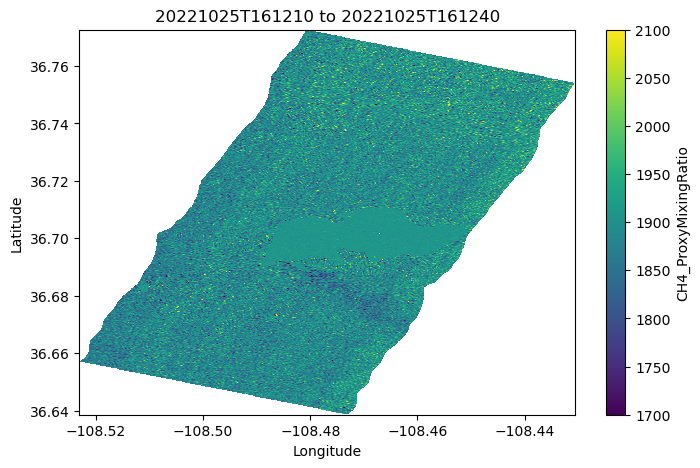

In [11]:
lon = pp.pmesh_prep('longitude').compute()
lat = pp.pmesh_prep('latitude').compute()
lon_lim = [np.nanmin(lon),np.nanmax(lon)]
lat_lim = [np.nanmin(lat),np.nanmax(lat)]
pp.heatmap('CH4_ProxyMixingRatio',grp='Posteriori_Profile',scale=1e9,vminmax=[1700,2100],lon_lim=lon_lim,lat_lim=lat_lim)

**Note**: grip_prep automatically deals with overlapping granules, it regrids the data on a same grid and averages multiple overpasses

All the groups and variables (indented under their group) with their dimensions can be shown with the **show_all** method

In [12]:
pp.show_all()

Level1
	 SolarZenithAngle ('atrack', 'xtrack')
	 ViewingZenithAngle ('atrack', 'xtrack')
	 RelativeAzimuthAngle ('atrack', 'xtrack')
	 ViewingAzimuthAngle ('atrack', 'xtrack')
	 SolarAzimuthAngle ('atrack', 'xtrack')
	 Longitude ('atrack', 'xtrack')
	 Latitude ('atrack', 'xtrack')
	 Time ('atrack', 'xtrack')
	 ObservationAltitude ('atrack', 'xtrack')
	 SurfaceAltitude ('atrack', 'xtrack')
	 CornerLongitudes ('nv', 'atrack', 'xtrack')
	 CornerLatitudes ('nv', 'atrack', 'xtrack')
Profile
	 AirPartialColumn ('lev', 'atrack', 'xtrack')
	 CO2_GasMixingRatio ('lev', 'atrack', 'xtrack')
	 CH4_GasMixingRatio ('lev', 'atrack', 'xtrack')
	 H2O_GasMixingRatio ('lev', 'atrack', 'xtrack')
	 CO2_ProxyMixingRatio ('atrack', 'xtrack')
	 CH4_ProxyMixingRatio ('atrack', 'xtrack')
	 H2O_ProxyMixingRatio ('atrack', 'xtrack')
RTM_Band1
OptProp_Band1
	 RefWvl_BRDF_KernelAmplitude_isotr ('atrack', 'xtrack')
Posteriori_Profile
	 PressureEdge ('lev_edge', 'atrack', 'xtrack')
	 AirPartialColumn ('lev', 'atrack'

For 3D variable, an option can be given (e.g. sum, max, mean) together with the dimension name on which to apply the option, for example we can plot the max Radiance in L1B files

In [13]:
l1 = get_msat('L1B_CH4_5x1')

In [14]:
l1

msat_collection:
        number of files: 15
        valid_xtrack: slice(26, 200, None)
        use_dask: True
        is_l1: True
        is_l2: False
        is_l3: False
        is_postproc: False
        is_l2_met: False
        

In [15]:
l1_pp = l1.subset(ids=[0,1])

In [16]:
l1_pp

msat_collection:
        number of files: 2
        valid_xtrack: slice(26, 200, None)
        use_dask: True
        is_l1: True
        is_l2: False
        is_l3: False
        is_postproc: False
        is_l2_met: False
        

In [17]:
l1_pp.file_names

array(['MethaneAIR_L1B_CH4_20221025T161210_20221025T161240_newl1b.nc',
       'MethaneAIR_L1B_CH4_20221025T161240_20221025T161311_newl1b.nc'],
      dtype='<U60')

In [18]:
l1_pp.search('rad')

GROUP: Band1	VAR: Radiance ('along_track', 'across_track', 'spectral_channel')
GROUP: Band1	VAR: RadianceUncertainty ('along_track', 'across_track', 'spectral_channel')
GROUP: Band1	VAR: RadianceFlag ('along_track', 'across_track', 'spectral_channel')


To plot the max radiance with **heatmap** we have to apply the **nanmax** option to the spectral axis:

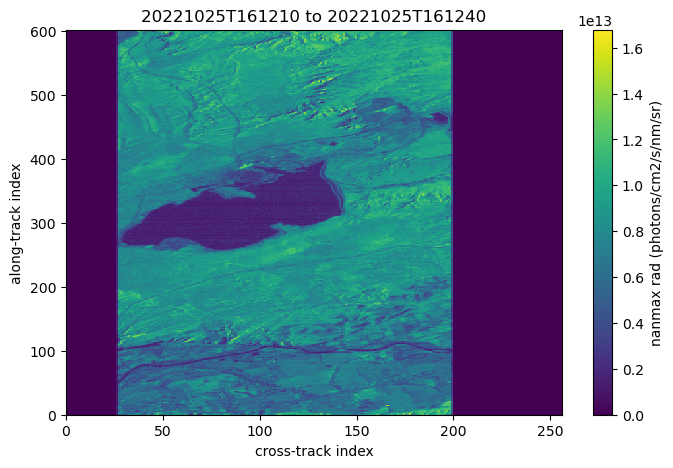

In [19]:
l1_pp.heatmap('rad',option='nanmax',option_axis_dim="spectral_channel")

To plot the data without the non-illuminated cross-track indices you can use the **use_valid_xtrack** argument:

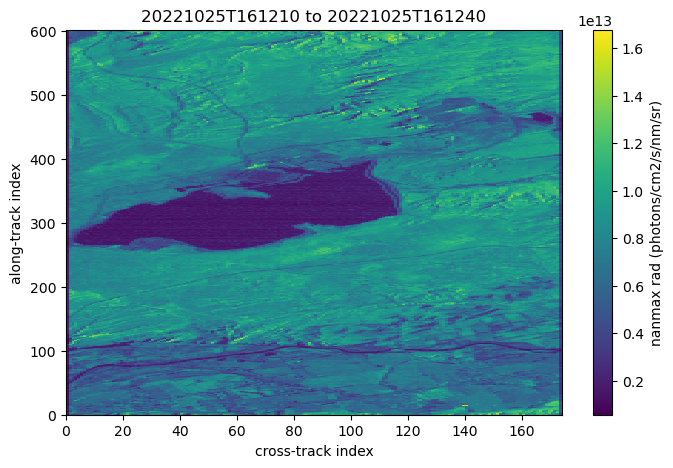

In [20]:
l1_pp.heatmap('rad',option='nanmax',option_axis_dim="spectral_channel",use_valid_xtrack=True)

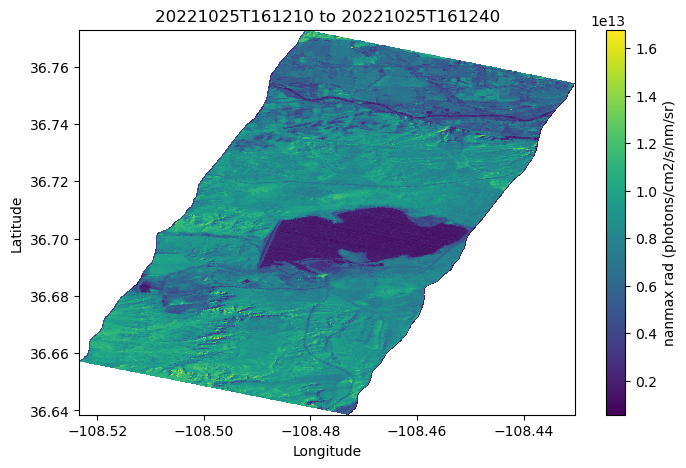

In [21]:
l1_pp.heatmap('rad',option='nanmax',option_axis_dim="spectral_channel",latlon=True)

You can also use the **msat_collection** object to read in latitude,longitude, and a variable of interest and create interactive graphs as described in the **[mair_geoviews notebook](https://github.com/rocheseb/msatutil/blob/master/notebooks/mair_geoviews.ipynb)**